# Crear una onda sinusoidal con amplitud A, período $\omega_0$  y $\phi_0$

La ecuacion de una señal sinusoidal es:
$$
y(t) = A \sin(\omega_0 t + \phi_0)
$$

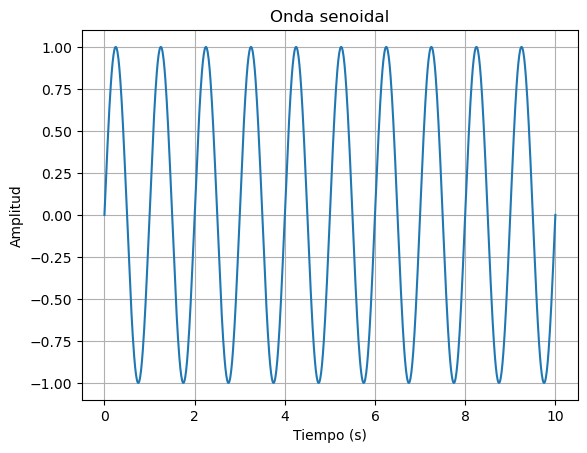

In [1]:
# crea una funcion senoidal y grafica su forma de onda
import numpy as np
import matplotlib.pyplot as plt

def sine_wave(A, omega_0, phi_0, t):
    """
    Crea una onda sinusoidal con amplitud A, período omega_0 y fase phi_0.
    """
    return A * np.sin(omega_0 * t + phi_0)
# Parámetros de la onda
A = 1  # Amplitud
omega_0 = 2 * np.pi  # Frecuencia angular (1 Hz)
phi_0 = 0  # Fase (en radianes)
# Tiempo de muestreo
t = np.linspace(0, 10, 1000)
# Generar la onda
y = sine_wave(A, omega_0, phi_0, t)
plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Onda senoidal')
plt.grid()

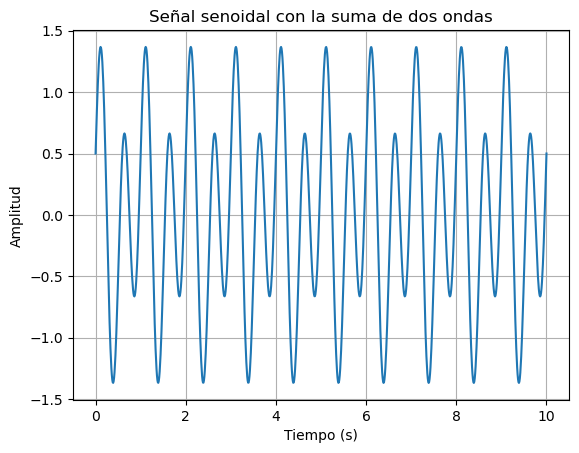

In [5]:
# Crea una señal senoidal con la suma de dos ondas senoidales
def sine_wave_sum(A1, omega_1, phi_1, A2, omega_2, phi_2, t):
    """    Crea una señal senoidal que es la suma de dos ondas senoidales.
    """
    return sine_wave(A1, omega_1, phi_1, t) + sine_wave(A2, omega_2, phi_2, t)
# Parámetros de las ondas
A1 = 1.0  # Amplitud de la primera onda
omega_1 = 2 * np.pi * 2.0  # Frecuencia angular (1 Hz)
phi_1 = 2 * np.pi * 5.0  # Fase de la primera onda
A2 = 0.5  # Amplitud de la segunda onda
omega_2 = 2 * np.pi  # Frecuencia angular de la segunda onda
phi_2 = np.pi/2  # Fase de la segunda onda
# Genera una señal senoidal con la suma de las dos ondas
y_sum = sine_wave_sum(A1, omega_1, phi_1, A2, omega_2, phi_2, t)
plt.figure()
plt.plot(t, y_sum)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal senoidal con la suma de dos ondas')
plt.grid()

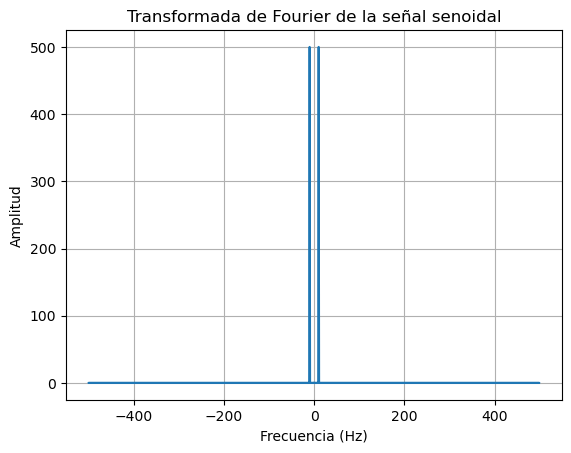

In [6]:
# Obten la transformada de Fourier de la señal senoidal 
def fourier_transform(signal, t):
    """
    Calcula la transformada de Fourier de una señal.
    """
    N = len(signal)
    dt = t[1] - t[0]
    f = np.fft.fftfreq(N, d=dt)
    F_signal = np.fft.fft(signal)
    return f, F_signal
# generar la señal senoidal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t)

# Obten la transformada de Fourier de la señal senoidal
f, F_signal = fourier_transform(signal, t)
plt.figure()
plt.plot(f, np.abs(F_signal))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de la señal senoidal')
plt.grid()